In [6]:
import matplotlib.pyplot as plt
import os
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [7]:
def funkcje(numer):
    match numer:
        case 1:
            return "5 * X1**3 - 2 * X1**2 + 3 * X1 - 17"
        case 2:
            return "math.sin(X1) + math.cos(X1)"
        case 3:
            return "2 * math.log(X1 + 1)"
        case 4:
            return "X1 + 2 * X2"
        case 5:
            return "math.sin(X1 / 2) + 2 * math.cos(X1)"
        case 6:
            return "X1**2 + 3 * X1 * X2 - 7 * X2 + 1"
        case _:
            return ""
        
def wyznaczenie_numeru_funkcji(nazwa_pliku):
    tabela = nazwa_pliku[:-4].split()
    return tabela[-4][-1]

def wyznaczenie_numeru_dziedziny(nazwa_pliku):
    tabela = nazwa_pliku[:-4].split()
    return tabela[-3][-1]

def wyznaczenie_przedzialow(nazwa_pliku):
    tabela = nazwa_pliku[:-4].split()
    if tabela[-1] == "pi":
        return -3.14, 3.14
    return tabela[-2], tabela[-1]

def wyznaczanie_kroku_funkcji(numer_funkcji, numer_dziedziny):
    match numer_funkcji:
        case 4:
            if numer_dziedziny == 3:
                return 1
            if numer_dziedziny == 4:
                return 10
        case 5:
            if numer_dziedziny>2:
                return 1
        case 6:
            if numer_dziedziny == 2:
                return 1
            if numer_dziedziny == 4:
                return 10
    
    return 0.1

In [51]:
def plotowanie_jednoargumentowe(p, k, funkcja, nr_funkcji):
    x_axis = []
    y_axis = []
    y_original = []
    # krok = 0.1
    krok = 0.03
    i = int(p)
    koniec = int(k)
    funkcja_original = funkcje(nr_funkcji)
    # evaluacja funkcji do tablic
    while i < koniec:
        sin = math.sin
        cos = math.cos
        X1 = i
        if i == 0:  #zeby nie bylo dzielenia czasem przez 0
            i+=krok
            continue
            X1 = 0.00000001
        y_axis.append(eval(funkcja))
        y_original.append(eval(funkcja_original))
        x_axis.append(i)
        i += krok

    return x_axis, y_axis, y_original

def wypisz_funkcje_jednoargumentowa(nazwa_pliku, sciezka_docelowa, nr_funkcji):
    with open(nazwa_pliku, 'r') as plik:
        zawartosc = plik.read()

    if len(zawartosc) > 0:
        zawartosc = zawartosc.replace(")(", ") * (")    #obsluga bledow )( gdy nie ma znaku mnozenia pomiedzy
        poczatek, koniec = wyznaczenie_przedzialow(nazwa_pliku)
        x, y_gp, y_original = plotowanie_jednoargumentowe(poczatek, koniec, zawartosc, nr_funkcji)

        plt.grid(True)
        plt.scatter(x, y_gp, color='green', label='TinyGP', s=10)
        plt.scatter(x, y_original, color='orange', label='Proper', s=10)
        plt.xlabel('Oś X')
        plt.ylabel('Oś Y')
        plt.legend()
        nazwa_obrazka = f"img{nazwa_pliku[nazwa_pliku.rfind(os.path.sep)+5:-4]}.png"
        plt.savefig(os.path.join(sciezka_docelowa, nazwa_obrazka))
        plt.show()

        return os.path.join(sciezka_docelowa, nazwa_obrazka)

def plotowanie_dwuargumentowe(p, k, funkcja, nr_funkcji, nr_dziedziny):
    y_axis = []
    y_original = []
    x1_axis = []
    x2_axis = []
    krok = wyznaczanie_kroku_funkcji(nr_funkcji, nr_dziedziny)
    funkcja_original = funkcje(nr_funkcji)
    i = int(p)
    koniec = int(k)
    
    while i < koniec:
        j = int(p)
        X1 = i
        if i == 0: #zeby nie bylo dzielenia czasem przez 0
            X1 = 0.001
        while j < koniec:
            X2 = j
            if j == 0:
                X2 = 0.001
            y_axis.append(eval(funkcja))
            y_original.append(eval(funkcja_original))
            x1_axis.append(i)
            x2_axis.append(j)
            j += krok
        i += krok
    
    return x1_axis, x2_axis, y_axis, y_original

def wypisz_funkcje_dwuargumentowa(nazwa_pliku, sciezka_docelowa, nr_funkcji):
    with open(nazwa_pliku, 'r') as plik:
        zawartosc = plik.read()
    if len(zawartosc) > 0:
        zawartosc = zawartosc.replace(")(", ") * (")    #obsluga bledow )( gdy nie ma znaku mnozenia pomiedzy
        poczatek, koniec = wyznaczenie_przedzialow(nazwa_pliku)
        nr_dziedziny = int(wyznaczenie_numeru_dziedziny(nazwa_pliku))
        x1, x2, y, y_original = plotowanie_dwuargumentowe(poczatek, koniec, zawartosc, nr_funkcji, nr_dziedziny)
        size = 5
        fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'})

        ax[0].scatter(x1, x2, y, color='green', label='TinyGP', s=size)
        ax[0].scatter(x1, x2, y_original, color='orange', label='Proper', s=size)

        ax[0].set_xlabel('X1')
        ax[0].set_ylabel('X2')
        ax[0].set_zlabel('Y')
        ax[0].legend()

        ax[1].scatter(x1, x2, y, color='green', label='TinyGP', s=size)
        ax[1].scatter(x1, x2, y_original, color='orange', label='Proper', s=size)
        ax[1].view_init(elev=30, azim=45)
        ax[1].text2D(0.05, 0.95, "Rzut z boku", transform=ax[1].transAxes)

        ax[1].set_xlabel('X1')
        ax[1].set_ylabel('X2')
        ax[1].set_zlabel('Y')
        ax[1].legend()
        
        nazwa_obrazka = f"img{nazwa_pliku[nazwa_pliku.rfind(os.path.sep)+5:-4]}.png"
        plt.savefig(os.path.join(sciezka_docelowa, nazwa_obrazka))
        plt.show()
        
        return os.path.join(sciezka_docelowa, nazwa_obrazka)

In [9]:
def znajdz_pliki_done(folder, pattern):
    pliki_done = []
    folder_done = os.path.join(folder, "files", "done")
    folder_img = os.path.join(folder, "files", "img")
    
    for plik in os.listdir(folder_done):
        if plik.startswith(pattern) and not plik.endswith("xmxp2.dat"):
            pelna_sciezka = os.path.join(folder_done, plik)
            # print(pelna_sciezka)
            nr_funkcji = int(wyznaczenie_numeru_funkcji(pelna_sciezka))
            if nr_funkcji<4:
                nazwa = wypisz_funkcje_jednoargumentowa(pelna_sciezka, folder_img, nr_funkcji)
            else:
                nazwa = wypisz_funkcje_dwuargumentowa(pelna_sciezka, folder_img, nr_funkcji)
                
            # print(nazwa)
            
    return pliki_done

In [ ]:
folder_glowny = os.getcwd() #sciezka do twojego folderu
pliki_done = znajdz_pliki_done(folder_glowny, "done zad1")

In [53]:
# x = "((X1 * cos ((X1  + (X1 * sin X1 )) - (3.0753746583620263 / 2.1505160546130666))) + (4.205075456405437 * cos (1.1998484260595044)))"
# x = "((X1 * sin( (X1 * cos( -0.006381789714943409)))) + (((-3.306893758042727 * sin( ((-2.658438231207861 * sin( -0.006381789714943409)) / (X1 * sin( (X1 * cos( (-3.149071034251137 * cos( 4.817852242024248))))))))) * sin( -0.5716652622879357)) * cos( (2.8932838741637026 / -0.18893569893329243))))"
x = "(((((1.2481613795794786 + 3.1609183048646763) * cos (-3.3727029658165497)) / ((X1  - -1.4326604607491191) - 2.1536205563737987)) - -3.6612148482648923) * cos (4.701238930177849))((X1  * sin ((X1  * cos (((((-0.6636166802962862 - 0.1924155012800357) - (-4.162037613085385 * cos (-1.0680833188060568))) - -1.6555666598947871) / 1.5335585133949579))))) + (-0.6332369212342313 * cos (((3.45262737656496 * sin (-3.652323549076577)) / ((4.413061576175297 * sin (4.667581497200517)) + (-3.11098024427631 + -1.1393263260228528))))))((X1  * sin ((-4.702912348027649 - (-4.702912348027649 - (X1  * cos ((((1.5513670786906752 * sin (-3.84868468499848)) * cos ((X1  - ((2.1110492179822486 * cos (-4.0775069480928945)) * (1.5396574686923632 * cos (-4.0775069480928945)))))) - -2.22677943696441))))))) + ((((X1  * sin ((X1  + ((4.086203649873493 * cos ((((-0.038691887874114705 + ((0.02663176310409998 * cos ((3.8522459652540526 * cos ((((((X1  + ((-3.8401776972544033 * cos (1.5513670786906752)) * cos ((-0.6762920586253349 * cos (-3.0670562454093044))))) + 1.3883444831355192) * sin (((X1  * (2.588603179558314 + 3.965954638180346)) * sin (-1.7726894854418296)))) * cos ((1.8097161852428751 * -0.39009278108907))) * 1.5396574686923632))))) / (((-0.7311367472888852 * sin ((4.375542969087711 * (((-0.6655226773165488 - X1 ) * sin (((4.763126272286069 * sin ((1.1384991401370677 / 0.23636093943753345))) / -2.572809639330067))) + 2.9011636625733637)))) * cos (-1.2391796996339055)) * -0.7570305404802449))) + (-3.9600474765930627 - -4.818176544430836)) * (0.5703052446296475 * (-4.0775069480928945 * cos (-4.0775069480928945)))))) - -4.821069101964196)))) + 3.9612020341997365) * -0.39009278108907) - ((-0.12774684184375573 / ((-0.7311367472888852 * ((((-0.038691887874114705 * cos ((((X1  * sin ((X1  / ((X1  * cos ((((1.5513670786906752 * cos (-2.5502226368775838)) / (((X1  - ((0.5703052446296475 + (X1  * sin ((-2.211092021558109 + X1 )))) - (((-0.02620096149518325 / (-0.7311367472888852 - (((((-0.02620096149518325 / -0.6655226773165488) * sin ((1.5396574686923632 * cos ((-2.8474919760752404 * sin (2.8648608535768325)))))) / -2.211092021558109) - ((1.1384991401370677 * 1.3578561378536245) - 2.059433468424629)) - -1.7726894854418296))) - 4.763126272286069) * -2.3375893037086493))) / 3.9612020341997365) - ((X1  * sin ((X1  * sin ((X1  * cos ((((X1  * sin ((-1.0880510259577991 * cos ((4.763126272286069 * cos (1.3883444831355192)))))) * sin ((-3.532017107278731 * sin (1.9014381632144195)))) + 1.3883444831355192))))))) / -0.5011255779966248))) - -3.9600474765930627))) * -1.4072209047860529)))) * cos ((((X1  * cos ((((1.442940599948523 * -3.84868468499848) * cos (((-2.211092021558109 * cos (2.588603179558314)) - 2.769354491490966))) - -4.821069101964196))) * cos ((((X1  * sin (((0.02663176310409998 * sin ((3.8522459652540526 + (((0.6856062298899248 + -0.7570305404802449) - -2.211092021558109) * (-3.532017107278731 * -2.22677943696441))))) * sin (((2.1110492179822486 * cos (-4.0775069480928945)) * -1.4072209047860529))))) * (X1  * sin ((((((3.965954638180346 * sin (4.086203649873493)) * cos (((3.0255160903530314 / (1.3883444831355192 - (((1.5513670786906752 * cos (-3.0373794614645178)) * cos (((X1  * sin (((-0.5859176081316093 - ((X1  / 1.442940599948523) * 1.5513670786906752)) * cos ((0.2885539850776464 * cos (1.3578561378536245)))))) + (1.5629305865430796 - ((-4.0775069480928945 * cos (-0.9057330451070751)) * 3.8522459652540526))))) - -4.821069101964196))) + (-3.9600474765930627 - -0.42082750105977595)))) / ((-2.211092021558109 * (-3.0670562454093044 * cos (3.965954638180346))) - 4.086203649873493)) - 0.018324887864705985) * cos ((-0.42082750105977595 * (((-3.532017107278731 * sin (1.9014381632144195)) * (-1.7726894854418296 * -1.0522344492971358)) * sin ((-4.741035126554306 * 0.5703052446296475))))))))) * cos ((0.5703052446296475 + (X1  * sin ((-2.211092021558109 + X1 )))))))) * sin (-4.821069101964196)))) / (-4.821069101964196 * sin (((X1  * sin ((((((2.1110492179822486 * cos (1.5396574686923632)) + (((-2.3375893037086493 * cos ((((((((3.419170544244418 * sin (3.157209910963484)) * cos ((((1.5513670786906752 * cos (-1.4002660024113966)) - (4.086203649873493 - (((X1  * sin ((((-1.4072209047860529 / 4.763126272286069) * (-1.4072209047860529 * cos ((-3.9600474765930627 * 2.8648608535768325)))) * cos (X1 )))) + 1.3883444831355192) * sin ((-2.211092021558109 * 2.1277840746348016))))) - -4.821069101964196))) - X1 ) * 1.8097161852428751) / (-4.702912348027649 - ((((X1  * sin (((0.02663176310409998 * sin ((3.419170544244418 + (((1.5396574686923632 + 4.086203649873493) - -2.211092021558109) + (((0.018324887864705985 * sin ((2.003434499792575 + ((X1  - (2.335541595704411 * (-2.8474919760752404 * sin (-0.9057330451070751)))) * cos (((0.29262994610255433 + -0.038691887874114705) - ((2.2643918143226127 / X1 ) * (1.5396574686923632 * cos ((X1  * cos ((((((2.1110492179822486 * cos (1.5396574686923632)) + (((-2.3375893037086493 * cos ((((1.5513670786906752 * sin ((3.8522459652540526 * (0.6856062298899248 * 1.9703986330696868)))) - ((((-3.84868468499848 * sin ((-2.572809639330067 - -0.02620096149518325))) * cos ((0.29262994610255433 * cos (1.9014381632144195)))) * sin ((-1.0522344492971358 - (1.442940599948523 / (4.086203649873493 + 4.375542969087711))))) + 3.419170544244418)) * sin (X1 )))) * sin ((-0.9057330451070751 - -1.0880510259577991))) / (-1.044339635378372 * cos (0.018324887864705985)))) / (1.5449593295149668 * (4.62732421696497 / -3.532017107278731))) - 2.1277840746348016) * -2.2120010180488894)))))))))))) * sin ((((1.5513670786906752 * cos (-3.84868468499848)) * cos (((-0.39009278108907 * (((-2.661814245973365 + 0.23636093943753345) * cos ((-3.0373794614645178 * sin (((-0.7311367472888852 * sin ((2.003434499792575 * (((-3.84868468499848 * cos (X1 )) * sin ((-1.0880510259577991 * sin (-1.7726894854418296)))) - 2.9011636625733637)))) * cos (-1.2391796996339055)))))) * sin ((2.9011636625733637 * sin (-4.170636076018447))))) + ((2.9011636625733637 - X1 ) * cos (((-0.6762920586253349 - -2.22677943696441) * cos (X1 ))))))) - -4.821069101964196))) * cos ((1.3883444831355192 * (((X1  / (-0.02620096149518325 * cos (4.763126272286069))) * cos (((0.29262994610255433 + 2.972360432602448) - 1.5513670786906752))) * sin (2.9011636625733637))))))))) * sin ((0.2885539850776464 * -0.7570305404802449))))) * (X1  * (((((3.965954638180346 * sin (4.086203649873493)) * cos ((((X1  * sin ((X1  * cos ((2.1110492179822486 - -0.5011255779966248))))) / -4.0775069480928945) * sin ((1.5396574686923632 * cos (-4.0775069480928945)))))) / ((-2.211092021558109 + (-3.0670562454093044 * cos (3.965954638180346))) - 4.086203649873493)) - -4.821069101964196) * (-0.42082750105977595 / (((-3.532017107278731 * sin (1.9014381632144195)) - (-0.5260837503118818 * 3.965954638180346)) / (-4.741035126554306 * 0.5703052446296475)))))) * cos ((0.5703052446296475 + (X1  * sin ((-2.211092021558109 + X1 )))))) * 2.2643918143226127))) - ((((-3.84868468499848 * sin ((-2.572809639330067 * sin (-0.02620096149518325)))) * cos ((0.29262994610255433 - -1.0522344492971358))) * sin (1.3883444831355192)) + 3.419170544244418)) * sin (X1 )))) * sin ((-0.9057330451070751 - -1.0880510259577991))) / (-1.044339635378372 + -0.02620096149518325))) / (1.5449593295149668 * (4.62732421696497 - -3.532017107278731))) - X1 ) * cos ((4.763126272286069 * cos (1.3883444831355192)))))) + 1.3883444831355192)))))) * (1.5396574686923632 * cos (1.1384991401370677))) - -3.4180197321782204) - (-0.02620096149518325 - (-0.5011255779966248 + 0.33865764438948887)))) * sin (X1 ))) * 1.5396574686923632)))((X1  * sin ((X1  * cos ((((((-3.893621488684004 * 1.0518939839025956) * sin (3.4508388546367907)) + -2.676749132438135) / (((((-4.080530650748725 * sin ((-3.7350617995191806 * cos (((4.432918221878801 * cos ((X1  * cos ((4.2995114209672884 * sin (-2.3893089670261958)))))) * cos ((-0.9104412778329065 * sin ((1.2345011964649322 * -3.8720858733405317))))))))) + ((X1  * sin ((-2.676749132438135 * cos (((((-3.893621488684004 * sin ((((((-0.8303905815058865 / (3.1144119379692086 * cos (1.242415174389242))) - -0.3006795149773476) * cos (-4.3514495402909645)) / ((1.2345011964649322 * cos (3.4155146754536254)) - -3.8720858733405317)) * cos (-3.325569795140988)))) - ((X1  * sin (((((-0.8303905815058865 * 4.317811226965739) * (-4.925960632473348 - 1.0518939839025956)) * cos (4.025840504885512)) * cos (4.269441480623236)))) + (1.0518939839025956 - (X1  * cos ((((((X1  * cos (2.132872224667425)) - 4.269441480623236) - ((X1  + 2.537746780674416) * -1.6711737987544915)) / (0.9280041530910745 * cos (-2.5796504311486315))) * sin (-0.3006795149773476))))))) / -0.395760996340659) * sin (((3.90356218324691 - X1 ) + (-3.192667006788694 * sin (-2.1056279929762525))))))))) + (1.0518939839025956 * (3.90356218324691 - -4.099225605145214)))) - (1.6233832742600907 / 1.026990655382046)) * cos (((-1.7191382823857326 - ((-2.676749132438135 * -2.3893089670261958) - ((((-1.0253040465749952 - (-3.325569795140988 * cos (0.9698683261193164))) * cos ((1.2345011964649322 * -3.8720858733405317))) / (-0.09801151336057767 * cos (-2.1056279929762525))) + -1.680090004857976))) / (-1.680090004857976 * cos (-3.35531997073222))))) * sin (X1 ))) * sin (1.0518939839025956)))))) + ((((((-4.301908482560179 * cos (((X1  * cos ((-2.4015702888010226 * -0.7316262616290743))) * cos ((X1  + (-4.925960632473348 * cos (-1.0253040465749952))))))) / X1 ) / 1.242415174389242) + (0.41380873489223013 * (4.317811226965739 * cos (1.026990655382046)))) - 2.2673081763761536) - -3.9897431979176066))"
count_l = 0
count_r = 0
count_cos_sin = 0
for i in x:
    if i == '(':
        count_l+=1
    if i == ')':
        count_r+=1
    if i == 's':
        count_cos_sin += 1

print(count_l, count_r, count_cos_sin)

580 580 175


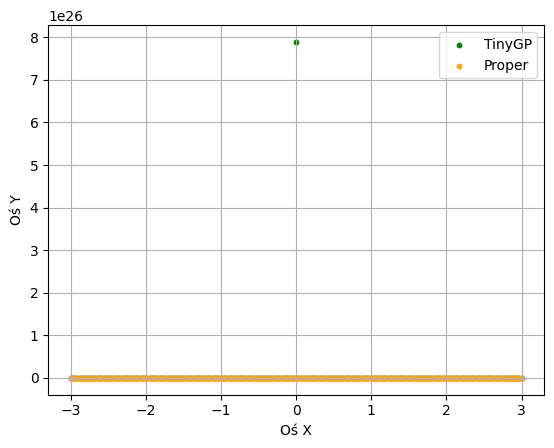

In [54]:
# plotowanie_jednoargumentowe(-3.14,3.14, x, 2)
x1 = x.replace(")(", ") * (") 
x, y_gp, y_original = plotowanie_jednoargumentowe(-3.14,3.14, x1, 2)

plt.grid(True)
plt.scatter(x, y_gp, color='green', label='TinyGP', s=10)
plt.scatter(x, y_original, color='orange', label='Proper', s=10)
plt.xlabel('Oś X')
plt.ylabel('Oś Y')
plt.legend()
# nazwa_obrazka = f"img{nazwa_pliku[nazwa_pliku.rfind(os.path.sep)+5:-4]}.png"
# plt.savefig(os.path.join(sciezka_docelowa, nazwa_obrazka))
plt.show()